In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib
%matplotlib inline

Using matplotlib backend: MacOSX


### Difficulty with Emotion Regulation (DERS) - Parent completed

In [23]:
ders = pd.read_csv('data/mh_p_ders.csv')
se_nms = ders.columns[:2]
ders.head()

,src_subject_id,eventname,ders_attn_awareness_p,ders_clear_feelings_p,ders_emotion_overwhelm_p,ders_feelings_attentive_p,ders_feelings_care_p,ders_feelings_know_p,ders_p_select_language___1,ders_upset_ack_p,...,ders_upset_feel_better_p,ders_upset_fixation_p,ders_upset_focus_p,ders_upset_guilty_p,ders_upset_irritation_p,ders_upset_long_time_better_p,ders_upset_lose_control_p,ders_upset_out_control_p,ders_upset_time_p,ders_upset_weak_p
0,NDAR_INV003RTV85,3_year_follow_up_y_arm_1,5,5,1,4,5,5,0,5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,NDAR_INV005V6D2C,3_year_follow_up_y_arm_1,2,2,1,5,5,5,1,5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,NDAR_INV007W6H7B,3_year_follow_up_y_arm_1,4,4,2,4,5,4,0,3,...,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
3,NDAR_INV007W6H7B,4_year_follow_up_y_arm_1,5,5,2,5,4,4,0,4,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,NDAR_INV00CY2MDM,3_year_follow_up_y_arm_1,2,2,2,2,2,2,0,2,...,2.0,2.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,1.0


In [24]:
ders.shape

(14708, 32)

In [25]:
ders[['src_subject_id', 'eventname']].nunique()

src_subject_id    10146
eventname             2
dtype: int64

In [26]:
ders[['eventname']].value_counts()

eventname               
3_year_follow_up_y_arm_1    10042
4_year_follow_up_y_arm_1     4666
Name: count, dtype: int64

* DERs measure first collected year 3

### Remove participants with unanswered items (777)
777 was coded for any item parents chose not to respond to

In [27]:
ogn = ders.shape[0]

In [28]:
# select rows that don't have 777 in any column
ders = ders[(ders != 777).all(1)]
print("Number & Percent of particpants excluded: {0}, {1}% of sample".format(ogn-ders.shape[0], round((1-ders.shape[0]/ogn)*100, 2)))

Number & Percent of particpants excluded: 482, 3.28% of sample


In [29]:
ders.describe()

,ders_attn_awareness_p,ders_clear_feelings_p,ders_emotion_overwhelm_p,ders_feelings_attentive_p,ders_feelings_care_p,ders_feelings_know_p,ders_p_select_language___1,ders_upset_ack_p,ders_upset_angry_p,ders_upset_ashamed_p,...,ders_upset_feel_better_p,ders_upset_fixation_p,ders_upset_focus_p,ders_upset_guilty_p,ders_upset_irritation_p,ders_upset_long_time_better_p,ders_upset_lose_control_p,ders_upset_out_control_p,ders_upset_time_p,ders_upset_weak_p
count,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14225.000000,...,14225.000000,14225.000000,14225.000000,14225.000000,14225.000000,14225.000000,14225.000000,14225.000000,14225.000000,14225.000000
mean,3.852945,3.842401,1.791227,3.562210,3.896106,3.726416,0.050682,3.666175,1.786799,1.469385,...,1.576942,1.960773,2.209982,1.514025,1.556485,1.622285,1.513673,1.516485,1.472056,1.409350
std,1.058379,1.075520,1.034788,1.165088,1.059444,1.067534,0.219355,1.156373,1.049575,0.796634,...,0.916127,1.103034,1.185714,0.836099,0.842357,0.884163,0.884881,0.898708,0.862085,0.768444
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,0.000000,4.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,0.000000,5.000000,2.000000,2.000000,...,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### columns with question items

In [30]:
 # removing sub and event name and select_language
cols_ignore = se_nms.tolist()
cols_ignore.append('ders_p_select_language___1')
ders_ts_cols = list(set(ders.columns).difference(cols_ignore))
print(len(ders_ts_cols))
ders_ts_cols

29


['ders_upset_time_p',
 'ders_upset_guilty_p',
 'ders_upset_ashamed_p',
 'ders_feelings_know_p',
 'ders_upset_angry_p',
 'ders_upset_behavior_control_p',
 'ders_upset_concentrate_p',
 'ders_upset_long_time_better_p',
 'ders_upset_irritation_p',
 'ders_upset_embarrassed_p',
 'ders_upset_control_p',
 'ders_feelings_care_p',
 'ders_attn_awareness_p',
 'ders_upset_better_p',
 'ders_upset_feel_better_p',
 'ders_upset_emotion_overwhelm_p',
 'ders_feelings_attentive_p',
 'ders_upset_behavior_p',
 'ders_upset_ack_p',
 'ders_upset_difficulty_p',
 'ders_upset_out_control_p',
 'ders_upset_depressed_p',
 'ders_upset_esteem_p',
 'ders_upset_lose_control_p',
 'ders_upset_fixation_p',
 'ders_upset_weak_p',
 'ders_upset_focus_p',
 'ders_emotion_overwhelm_p',
 'ders_clear_feelings_p']

### DERS full scale questions
* abcd DERS only has 29 qeustions, so need to compare with main 36 item DERS to see which questions are present
* in order to compute total and subscale scores
* 

In [31]:
fders = pd.read_excel('ders_questions_ordered.xlsx')
fders.dropna(inplace=True)
print(fders.shape)
fders.reset_index(inplace=True, drop=True)
fders.to_csv('ders_questions_ordered_cl.csv', index=False)
fders

(36, 1)


,Question
0,I am clear about my feelings.
1,I pay attention to how I feel.
2,I experience my emotions as overwhelming and o...
3,I have no idea how I am feeling.
4,I have difficulty making sense out of my feeli...
5,I am attentive to my feelings.
6,I know exactly how I am feeling.
7,I care about what I am feeling.
8,I am confused about how I feel.
9,"When I’m upset, I acknowledge my emotions."


### ABCD DERS measure

In [32]:
aders = pd.read_excel('ders_questions_abcd.xlsx')
aders.head()

,Table,Variable,Question,FullDersQuestionNum,Options,Category
0,mh_p_ders,ders_attn_awareness_p,My child pays attention to how he/she feels,2,1=almost never ; 2=sometimes ; 3=about half th...,diff_emotion_reg_p01
1,mh_p_ders,ders_clear_feelings_p,My child is clear about his/her feelings,1,1=almost never ; 2=sometimes ; 3=about half th...,diff_emotion_reg_p01
2,mh_p_ders,ders_emotion_overwhelm_p,My child experiences his/her emotions as overw...,3,1=almost never ; 2=sometimes ; 3=about half th...,diff_emotion_reg_p01
3,mh_p_ders,ders_feelings_attentive_p,My child is attentive to his/her feelings.,6,1=almost never ; 2=sometimes ; 3=about half th...,diff_emotion_reg_p01
4,mh_p_ders,ders_feelings_care_p,My child cares about what he/she is feeling.,8,1=almost never ; 2=sometimes ; 3=about half th...,diff_emotion_reg_p01


### Fuzzy Matching attempt

In [33]:
from fuzzywuzzy import process

threshold = 50

list1 = fders['Question']
list2 = aders['Question']


response = []
for name_to_find in list1:
    resp_match =  process.extractOne(name_to_find ,list2)
    if resp_match[1] > threshold:
         row = {'full_ders_item':name_to_find,'abcd_ders_name':resp_match[0], 'score':resp_match[1]}
         response.append(row)
         # print(row)

results = pd.DataFrame(response)

# If you need all the 'actual_name' tp be in the datframe, continue below
# Otherwise don't include these last 2 lines of code
unmatched = pd.DataFrame([x for x in list2 if x not in list(results['abcd_ders_name'])], columns=['abcd_ders_name'])
results = pd.concat([results, unmatched], sort=False).reset_index(drop=True)
results

,full_ders_item,abcd_ders_name,score
0,I am clear about my feelings.,My child pays attention to how he/she feels,86.0
1,I pay attention to how I feel.,My child knows exactly how he/she is feeling.,86.0
2,I experience my emotions as overwhelming and o...,My child experiences his/her emotions as overw...,87.0
3,I have no idea how I am feeling.,"When my child is upset, he/she becomes angry w...",86.0
4,I have difficulty making sense out of my feeli...,"When my child is upset, he/she becomes angry w...",86.0
5,I am attentive to my feelings.,My child experiences his/her emotions as overw...,86.0
6,I know exactly how I am feeling.,"When my child is upset, he/she becomes angry w...",86.0
7,I care about what I am feeling.,"When my child is upset, he/she becomes angry w...",86.0
8,I am confused about how I feel.,"When my child is upset, he/she knows that he/s...",86.0
9,"When I’m upset, I acknowledge my emotions.",My child experiences his/her emotions as overw...,86.0


In [34]:
set(fders).intersection(ders)

set()

* Set comparison and Fuzzywuzzy matching didn't work, due to the length and similarity across items
* so I manually matched them in excel
* Load the match index below

### Items excluded from ABCD DERS questionnaire

In [35]:
aders = pd.read_excel('ders_questions_abcd.xlsx')
# quesitons not present in the ABCD DERS questionnaire
ders_items_excluded = set(np.arange(36)+1).difference(aders['FullDersQuestionNum'])
ders_items_excluded

{4, 5, 9, 17, 20, 31, 34}

## Setup to Score DERS

In [36]:
# items to revesrse score
q_rev_score = [1, 2, 6, 7, 8, 10, 17, 20, 22, 24, 34]
# Subscaling Scoring 

# items to combine for each subscale
nonaccept = [11, 12, 21, 23, 25, 29]
goals = [13, 18, 20, 26, 33]
impulse = [3, 14, 19, 24, 27, 32]
awareness = [2, 6, 8, 10, 17, 34]
strategies = [15, 16, 22, 38, 20, 31, 35, 36]
clarity = [1, 4, 5, 7, 9]

# get variable names for subscales
nonaccept_nm = aders[aders['FullDersQuestionNum'].isin(nonaccept)]['Variable'].tolist()
goals_nm = aders[aders['FullDersQuestionNum'].isin(goals)]['Variable'].tolist()
impulse_nm = aders[aders['FullDersQuestionNum'].isin(impulse)]['Variable'].tolist()
awareness_nm = aders[aders['FullDersQuestionNum'].isin(awareness)]['Variable'].tolist()
strategies_nm = aders[aders['FullDersQuestionNum'].isin(strategies)]['Variable'].tolist()
clarity_nm = aders[aders['FullDersQuestionNum'].isin(clarity)]['Variable'].tolist()

# obtain variables that need Reverse Score
qnm_rev_score = aders[aders['FullDersQuestionNum'].isin(q_rev_score)]['Variable'].tolist()

### Reverse Score
* 8 items included that need reverse scoring

In [37]:
impulse_nm

['ders_emotion_overwhelm_p',
 'ders_upset_behavior_control_p',
 'ders_upset_behavior_p',
 'ders_upset_control_p',
 'ders_upset_lose_control_p',
 'ders_upset_out_control_p']

In [38]:
# ONLY RUN ONCE
ders[qnm_rev_score] = ders[qnm_rev_score] * -1

In [39]:
# sum across total score columns
ders['ders_total_score'] = ders[ders_ts_cols].sum(axis=1)
ders['ders_impulse_score'] = ders[impulse_nm].sum(axis=1)
ders['ders_nonaccept_score'] = ders[nonaccept_nm].sum(axis=1)
ders['ders_goals_score'] = ders[goals_nm].sum(axis=1)
ders['ders_awareness_score'] = ders[awareness_nm].sum(axis=1)
ders['ders_strategies_score'] = ders[strategies_nm].sum(axis=1)
ders['ders_clarity_score'] = ders[clarity_nm].sum(axis=1)
print(ders.shape)
ders.head()

(14226, 39)


,src_subject_id,eventname,ders_attn_awareness_p,ders_clear_feelings_p,ders_emotion_overwhelm_p,ders_feelings_attentive_p,ders_feelings_care_p,ders_feelings_know_p,ders_p_select_language___1,ders_upset_ack_p,...,ders_upset_out_control_p,ders_upset_time_p,ders_upset_weak_p,ders_total_score,ders_impulse_score,ders_nonaccept_score,ders_goals_score,ders_awareness_score,ders_strategies_score,ders_clarity_score
0,NDAR_INV003RTV85,3_year_follow_up_y_arm_1,-5,-5,1,-4,-5,-5,0,-5,...,1.0,1.0,1.0,-18.0,0.0,6.0,4.0,-19,-1.0,-10
1,NDAR_INV005V6D2C,3_year_follow_up_y_arm_1,-2,-2,1,-5,-5,-5,1,-5,...,1.0,1.0,1.0,4.0,4.0,13.0,6.0,-17,3.0,-7
2,NDAR_INV007W6H7B,3_year_follow_up_y_arm_1,-4,-4,2,-4,-5,-4,0,-3,...,2.0,1.0,1.0,-1.0,5.0,6.0,7.0,-16,2.0,-8
3,NDAR_INV007W6H7B,4_year_follow_up_y_arm_1,-5,-5,2,-5,-4,-4,0,-4,...,1.0,1.0,1.0,-13.0,1.0,6.0,6.0,-18,-1.0,-9
4,NDAR_INV00CY2MDM,3_year_follow_up_y_arm_1,-2,-2,2,-2,-2,-2,0,-2,...,2.0,3.0,1.0,24.0,10.0,6.0,11.0,-8,6.0,-4


In [40]:
ders.describe()

,ders_attn_awareness_p,ders_clear_feelings_p,ders_emotion_overwhelm_p,ders_feelings_attentive_p,ders_feelings_care_p,ders_feelings_know_p,ders_p_select_language___1,ders_upset_ack_p,ders_upset_angry_p,ders_upset_ashamed_p,...,ders_upset_out_control_p,ders_upset_time_p,ders_upset_weak_p,ders_total_score,ders_impulse_score,ders_nonaccept_score,ders_goals_score,ders_awareness_score,ders_strategies_score,ders_clarity_score
count,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14225.000000,...,14225.000000,14225.000000,14225.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000
mean,-3.852945,-3.842401,1.791227,-3.562210,-3.896106,-3.726416,0.050682,-3.666175,1.786799,1.469385,...,1.516485,1.472056,1.409350,6.747926,4.803740,9.495923,9.053283,-14.977436,2.815549,-7.568818
std,1.058379,1.075520,1.034788,1.165088,1.059444,1.067534,0.219355,1.156373,1.049575,0.796634,...,0.898708,0.862085,0.768444,17.327212,4.586662,4.141235,4.190907,3.805054,3.544406,1.940868
min,-5.000000,-5.000000,1.000000,-5.000000,-5.000000,-5.000000,0.000000,-5.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-19.000000,0.000000,6.000000,3.000000,-20.000000,-1.000000,-10.000000
25%,-5.000000,-5.000000,1.000000,-4.000000,-5.000000,-5.000000,0.000000,-5.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-6.000000,1.000000,6.000000,6.000000,-18.000000,0.000000,-9.000000
50%,-4.000000,-4.000000,1.000000,-4.000000,-4.000000,-4.000000,0.000000,-4.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,3.000000,4.000000,8.000000,8.000000,-16.000000,2.000000,-8.000000
75%,-3.000000,-3.000000,2.000000,-3.000000,-3.000000,-3.000000,0.000000,-3.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,16.000000,7.000000,11.000000,11.000000,-12.000000,4.000000,-6.000000
max,-1.000000,-1.000000,5.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,90.000000,24.000000,30.000000,20.000000,-4.000000,19.000000,-2.000000


<Axes: ylabel='Frequency'>

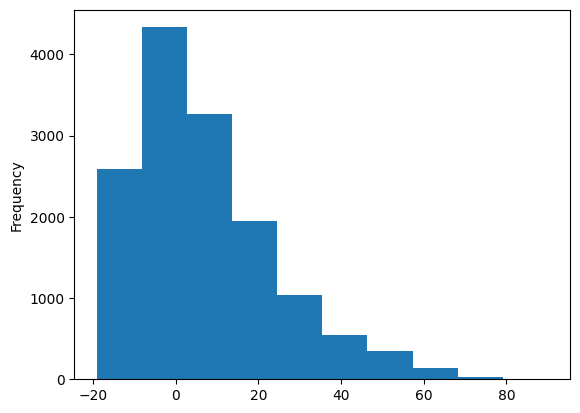

In [41]:
ders['ders_total_score'].plot.hist()

<Axes: ylabel='Frequency'>

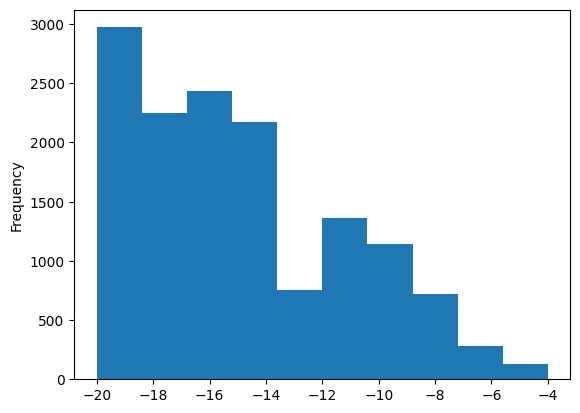

In [49]:
ders['ders_awareness_score'].plot.hist()

<Axes: ylabel='Frequency'>

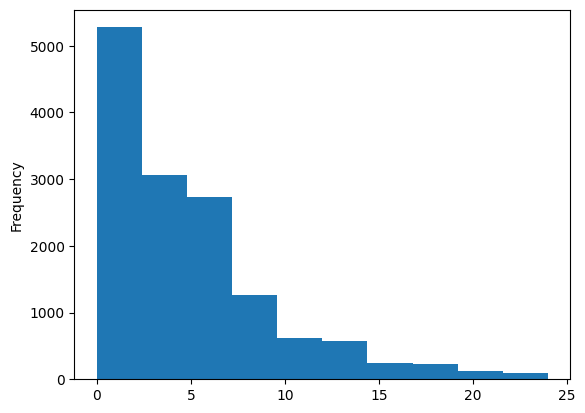

In [42]:
ders['ders_impulse_score'].plot.hist()

In [43]:
 # & (ders['ders_clear_feelings_p']<777)
ders = ders[(ders['ders_total_score']<200)]
ders.shape

(14226, 39)

In [44]:
ders.describe()

,ders_attn_awareness_p,ders_clear_feelings_p,ders_emotion_overwhelm_p,ders_feelings_attentive_p,ders_feelings_care_p,ders_feelings_know_p,ders_p_select_language___1,ders_upset_ack_p,ders_upset_angry_p,ders_upset_ashamed_p,...,ders_upset_out_control_p,ders_upset_time_p,ders_upset_weak_p,ders_total_score,ders_impulse_score,ders_nonaccept_score,ders_goals_score,ders_awareness_score,ders_strategies_score,ders_clarity_score
count,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14225.000000,...,14225.000000,14225.000000,14225.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000,14226.000000
mean,-3.852945,-3.842401,1.791227,-3.562210,-3.896106,-3.726416,0.050682,-3.666175,1.786799,1.469385,...,1.516485,1.472056,1.409350,6.747926,4.803740,9.495923,9.053283,-14.977436,2.815549,-7.568818
std,1.058379,1.075520,1.034788,1.165088,1.059444,1.067534,0.219355,1.156373,1.049575,0.796634,...,0.898708,0.862085,0.768444,17.327212,4.586662,4.141235,4.190907,3.805054,3.544406,1.940868
min,-5.000000,-5.000000,1.000000,-5.000000,-5.000000,-5.000000,0.000000,-5.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-19.000000,0.000000,6.000000,3.000000,-20.000000,-1.000000,-10.000000
25%,-5.000000,-5.000000,1.000000,-4.000000,-5.000000,-5.000000,0.000000,-5.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-6.000000,1.000000,6.000000,6.000000,-18.000000,0.000000,-9.000000
50%,-4.000000,-4.000000,1.000000,-4.000000,-4.000000,-4.000000,0.000000,-4.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,3.000000,4.000000,8.000000,8.000000,-16.000000,2.000000,-8.000000
75%,-3.000000,-3.000000,2.000000,-3.000000,-3.000000,-3.000000,0.000000,-3.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,16.000000,7.000000,11.000000,11.000000,-12.000000,4.000000,-6.000000
max,-1.000000,-1.000000,5.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,90.000000,24.000000,30.000000,20.000000,-4.000000,19.000000,-2.000000


In [46]:
cols2out = se_nms.tolist()
cols2out += [c for c in ders.columns if 'score' in c]
ders_sh = ders[cols2out]
ders_sh.to_csv('data/abcd5.0_ders_scores.csv', index=False)

In [47]:
cols2out

['src_subject_id',
 'eventname',
 'ders_total_score',
 'ders_impulse_score',
 'ders_nonaccept_score',
 'ders_goals_score',
 'ders_awareness_score',
 'ders_strategies_score',
 'ders_clarity_score']

In [48]:
print(ders_sh.shape)
ders_sh.head()

(14226, 9)


,src_subject_id,eventname,ders_total_score,ders_impulse_score,ders_nonaccept_score,ders_goals_score,ders_awareness_score,ders_strategies_score,ders_clarity_score
0,NDAR_INV003RTV85,3_year_follow_up_y_arm_1,-18.0,0.0,6.0,4.0,-19,-1.0,-10
1,NDAR_INV005V6D2C,3_year_follow_up_y_arm_1,4.0,4.0,13.0,6.0,-17,3.0,-7
2,NDAR_INV007W6H7B,3_year_follow_up_y_arm_1,-1.0,5.0,6.0,7.0,-16,2.0,-8
3,NDAR_INV007W6H7B,4_year_follow_up_y_arm_1,-13.0,1.0,6.0,6.0,-18,-1.0,-9
4,NDAR_INV00CY2MDM,3_year_follow_up_y_arm_1,24.0,10.0,6.0,11.0,-8,6.0,-4


# Emotional Regulation Questionnaire - Youth completed

In [21]:
erq = pd.read_csv("data/mh_y_erq.csv")
erq.head()

,src_subject_id,eventname,erq_admin,erq_feelings_control,erq_feelings_happy,erq_feelings_hide,erq_feelings_less_bad,erq_feelings_self,erq_feelings_think,erq_ss_reappraisal_pr,erq_ss_suppress_pr
0,NDAR_INV003RTV85,3_year_follow_up_y_arm_1,1.0,2,2,2,2,2,3,NaN,NaN
1,NDAR_INV005V6D2C,3_year_follow_up_y_arm_1,1.0,2,4,4,3,3,3,NaN,NaN
2,NDAR_INV007W6H7B,3_year_follow_up_y_arm_1,1.0,2,3,1,3,3,4,NaN,NaN
3,NDAR_INV007W6H7B,4_year_follow_up_y_arm_1,2.0,3,2,4,3,3,2,NaN,NaN
4,NDAR_INV00CY2MDM,3_year_follow_up_y_arm_1,1.0,3,4,3,4,2,4,NaN,NaN


In [22]:
erq.shape

(15032, 11)

In [23]:
erq[['src_subject_id', 'eventname']].nunique()

src_subject_id    10364
eventname             2
dtype: int64

In [10]:
erq[['eventname']].value_counts()

eventname               
3_year_follow_up_y_arm_1    10299
4_year_follow_up_y_arm_1     4733
Name: count, dtype: int64

* ERQ first collected year 3

In [11]:
erq.columns

Index(['src_subject_id', 'eventname', 'erq_admin', 'erq_feelings_control',
       'erq_feelings_happy', 'erq_feelings_hide', 'erq_feelings_less_bad',
       'erq_feelings_self', 'erq_feelings_think', 'erq_ss_reappraisal_pr',
       'erq_ss_suppress_pr'],
      dtype='object')

In [16]:
reappraisal_cols = ['erq_feelings_happy', 'erq_feelings_less_bad', 'erq_feelings_think']
suppression_cols = ['erq_feelings_control', 'erq_feelings_hide', 'erq_feelings_self']

In [17]:
erq['erq_ss_reappraisal_pr'].isnull().sum()

15032

### Create ERQ scale and subscale scores

In [41]:
erq['er_reappraisal'] = erq[reappraisal_cols].mean(axis=1)
erq['er_suppression'] = erq[suppression_cols].mean(axis=1)
erq.head()

,src_subject_id,eventname,erq_admin,erq_feelings_control,erq_feelings_happy,erq_feelings_hide,erq_feelings_less_bad,erq_feelings_self,erq_feelings_think,erq_ss_reappraisal_pr,erq_ss_suppress_pr,reappraisal,suppression,er_reappraisal,er_suppression
0,NDAR_INV003RTV85,3_year_follow_up_y_arm_1,1.0,2,2,2,2,2,3,NaN,NaN,7,6,2.333333,2.000000
1,NDAR_INV005V6D2C,3_year_follow_up_y_arm_1,1.0,2,4,4,3,3,3,NaN,NaN,10,9,3.333333,3.000000
2,NDAR_INV007W6H7B,3_year_follow_up_y_arm_1,1.0,2,3,1,3,3,4,NaN,NaN,10,6,3.333333,2.000000
3,NDAR_INV007W6H7B,4_year_follow_up_y_arm_1,2.0,3,2,4,3,3,2,NaN,NaN,7,10,2.333333,3.333333
4,NDAR_INV00CY2MDM,3_year_follow_up_y_arm_1,1.0,3,4,3,4,2,4,NaN,NaN,12,8,4.000000,2.666667


In [42]:
erqc = erq[['src_subject_id', 'eventname', 'er_reappraisal', 'er_suppression']]
# erqc.to_csv('data/abcd5.0_emotion_regulation_scores.csv', index=False)

In [43]:
erqc.tail()

,src_subject_id,eventname,er_reappraisal,er_suppression
15027,NDAR_INVZZZ2ALR6,4_year_follow_up_y_arm_1,3.333333,2.333333
15028,NDAR_INVZZZNB0XC,3_year_follow_up_y_arm_1,3.666667,2.333333
15029,NDAR_INVZZZNB0XC,4_year_follow_up_y_arm_1,4.333333,3.000000
15030,NDAR_INVZZZP87KR,3_year_follow_up_y_arm_1,3.333333,3.333333
15031,NDAR_INVZZZP87KR,4_year_follow_up_y_arm_1,3.333333,3.666667


In [44]:
erqc.shape

(15032, 4)

In [45]:
erqc.describe()

,er_reappraisal,er_suppression
count,15032.000000,15032.000000
mean,7.551623,6.360076
std,46.277348,40.134670
min,1.000000,1.000000
25%,3.000000,2.666667
50%,3.333333,3.000000
75%,4.000000,3.666667
max,777.000000,777.000000


### Remove participants with erroneous scores
* Some values fall outside the range of the scale, so we need investigate and removed participants with wrong scores
* High scores on either scale are well above expected max values around 20-30
* these can be safely removed (194 samples), as this will be part or all of my target variable so can't have missing values

In [46]:
erqc.loc[(erqc['er_suppression']>100) | (erqc['er_reappraisal']>100)]

,src_subject_id,eventname,er_reappraisal,er_suppression
130,NDAR_INV08EFDKZ6,3_year_follow_up_y_arm_1,261.666667,4.000000
365,NDAR_INV0NK7MVCJ,3_year_follow_up_y_arm_1,2.333333,261.000000
392,NDAR_INV0PLKFP06,4_year_follow_up_y_arm_1,261.000000,4.000000
447,NDAR_INV0V80916L,3_year_follow_up_y_arm_1,519.000000,3.000000
474,NDAR_INV0X59EG8X,3_year_follow_up_y_arm_1,2.000000,260.333333
...,...,...,...,...
14654,NDAR_INVZ547MN37,3_year_follow_up_y_arm_1,262.000000,4.666667
14782,NDAR_INVZF82Z2N1,3_year_follow_up_y_arm_1,260.666667,3.000000
14802,NDAR_INVZGT6YAX7,3_year_follow_up_y_arm_1,3.000000,261.333333
14877,NDAR_INVZN79XCAX,3_year_follow_up_y_arm_1,777.000000,262.000000


In [47]:
erqc = erqc.loc[(erqc['er_suppression']<100) & (erqc['er_reappraisal']<100)]
erqc.describe()

,er_reappraisal,er_suppression
count,14838.000000,14838.000000
mean,3.367143,3.168509
std,0.771490,0.868112
min,1.000000,1.000000
25%,3.000000,2.666667
50%,3.333333,3.000000
75%,4.000000,3.666667
max,5.000000,5.000000


In [48]:
erqc.shape

(14838, 4)

In [49]:
erqc.isnull().any()

src_subject_id    False
eventname         False
er_reappraisal    False
er_suppression    False
dtype: bool

* cleaned with no missing values - ready to be saved

### Save cleaned Emotion Regulation Questionnaire Scores

In [50]:
erqc.to_csv('data/abcd5.0_emotion_regulation_scores.csv', index=False)